In [97]:
import pm4py
import pandas as pd

# pd.options.display.max_rows = 4000

In [98]:
log = pd.read_csv("ircc_uOttawa.csv")

/var/folders/b6/7128wh613rqcbppftg_0hb2h0000gn/T/ipykernel_99034/1794484339.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  log = pd.read_csv("ircc_uOttawa.csv")


# Data analysis

In [99]:
log

,Unnamed: 0,case_id,timestamp,act_upd_by,activity_id,group,cor,event,new_time
0,0,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Misrepresentation - NIL,1717372800
1,1,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Eligibility Assessment - NIL,1717372800
2,2,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Final Assessment - NIL,1717372800
3,3,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Received - Date,1717372800
4,4,1,2024-06-03 09:20:37.327,EAIMEL,1-SQ1RI5F,NaN,Vietnam,Application Status - Prospective,1717406437
...,...,...,...,...,...,...,...,...,...
543278,543278,7734,2024-06-17 07:46:39.433,SS36358,1-STC2A6X,NaN,Belgium,Other Reqs Assessment - NIL,1718610399
543279,543279,7734,2024-06-26 08:11:25.043,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Review Required,1719389485
543280,543280,7734,2024-06-28 10:45:09.050,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Failed,1719571509
543281,543281,7734,2024-06-28 10:45:09.587,SS36358,1-STC2A6X,NaN,Belgium,Final Assessment - Refused,1719571509


In [102]:
from log_stats import get_relation_details, get_att_presence, get_trace_lengths, count_events, count_cases_per_event, filter_events_on_counts

In [103]:
get_relation_details('act_upd_by', 'activity_id', log, True)

964 (out of 1312) act_upd_by with many activity_id
17306 (out of 115131) activity_id with many act_upd_by
many-many


In [104]:
get_att_presence('activity_id', log)

total: 543283
unique: 115131
na: 127
not na: 543156


In [105]:
get_att_presence('act_upd_by', log)

total: 543283
unique: 1312
na: 0
not na: 543283


In [106]:
get_att_presence('event', log)

total: 543283
unique: 274
na: 0
not na: 543283


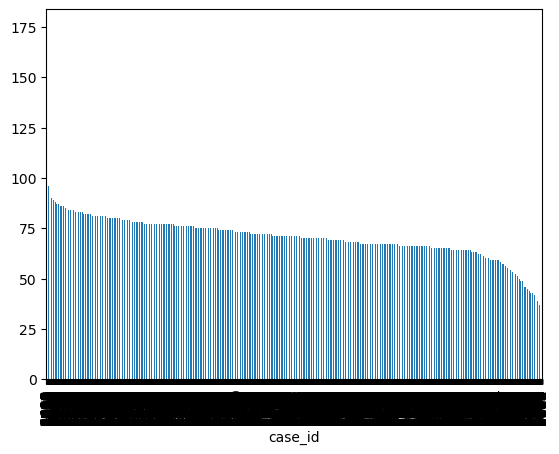

In [107]:
trace_lens = get_trace_lengths('event', 'case_id', log)

In [108]:
trace_lens.describe()

count    7734.000000
mean       70.246056
std        10.070505
min        13.000000
25%        66.000000
50%        71.000000
75%        77.000000
max       175.000000
Name: event, dtype: float64

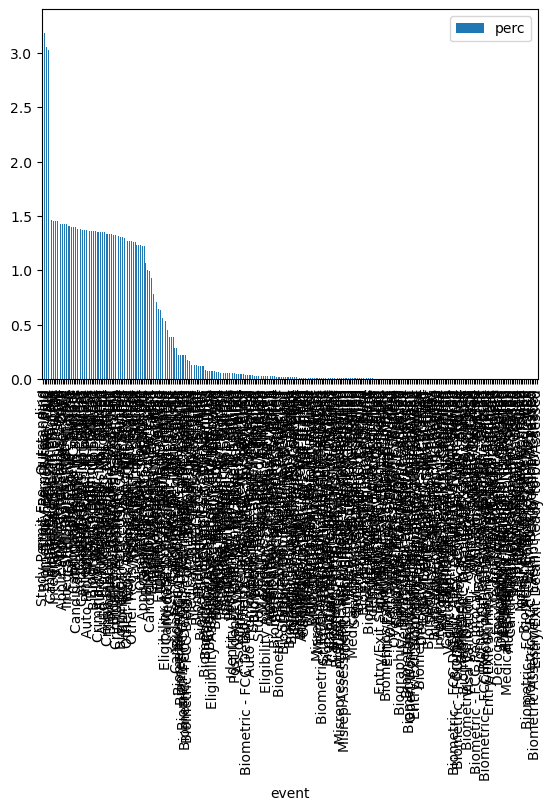

In [109]:
evts_counts = count_events('event', 'case_id', log)

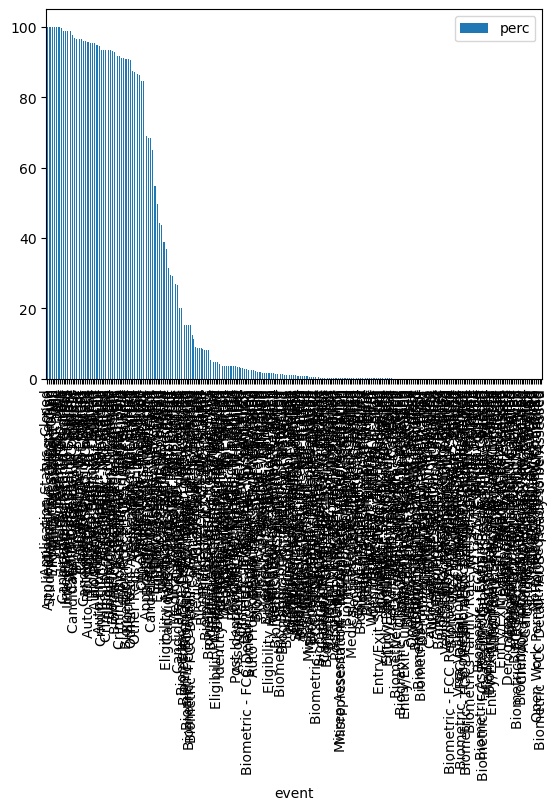

In [110]:
evts_cases_counts = count_cases_per_event('event', 'case_id', log)

In [111]:
log2 = filter_events_on_counts('event', 1, evts_cases_counts, log)
log2

,Unnamed: 0,case_id,timestamp,act_upd_by,activity_id,group,cor,event,new_time
0,0,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Misrepresentation - NIL,1717372800
1,1,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Eligibility Assessment - NIL,1717372800
2,2,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Final Assessment - NIL,1717372800
3,3,1,2024-06-03 00:00:00.000,CLIENT,0,NaN,Vietnam,Received - Date,1717372800
4,4,1,2024-06-03 09:20:37.327,EAIMEL,1-SQ1RI5F,NaN,Vietnam,Application Status - Prospective,1717406437
...,...,...,...,...,...,...,...,...,...
543278,543278,7734,2024-06-17 07:46:39.433,SS36358,1-STC2A6X,NaN,Belgium,Other Reqs Assessment - NIL,1718610399
543279,543279,7734,2024-06-26 08:11:25.043,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Review Required,1719389485
543280,543280,7734,2024-06-28 10:45:09.050,SS36358,1-STC2A6X,NaN,Belgium,Eligibility Assessment - Failed,1719571509
543281,543281,7734,2024-06-28 10:45:09.587,SS36358,1-STC2A6X,NaN,Belgium,Final Assessment - Refused,1719571509


In [ ]:
count_cases_per_event('event', 'case_id', log2)

# Process Mining!

In [113]:
log = log2

In [114]:
log = log[['case_id', 'event', 'timestamp', 'act_upd_by', 'cor']]
log = log.rename(columns={ 'case_id' : 'case:concept:name', 'event': 'concept:name', 'timestamp': 'time:timestamp' })
log['case:concept:name'] = log['case:concept:name'].astype(str)
log['time:timestamp'] = pd.to_datetime(log['time:timestamp'])
log

,case:concept:name,concept:name,time:timestamp,act_upd_by,cor
0,1,Misrepresentation - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
1,1,Eligibility Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
2,1,Final Assessment - NIL,2024-06-03 00:00:00.000,CLIENT,Vietnam
3,1,Received - Date,2024-06-03 00:00:00.000,CLIENT,Vietnam
4,1,Application Status - Prospective,2024-06-03 09:20:37.327,EAIMEL,Vietnam
...,...,...,...,...,...
543278,7734,Other Reqs Assessment - NIL,2024-06-17 07:46:39.433,SS36358,Belgium
543279,7734,Eligibility Assessment - Review Required,2024-06-26 08:11:25.043,SS36358,Belgium
543280,7734,Eligibility Assessment - Failed,2024-06-28 10:45:09.050,SS36358,Belgium
543281,7734,Final Assessment - Refused,2024-06-28 10:45:09.587,SS36358,Belgium


In [117]:
from variant_stats import get_variants, get_variants_stats, get_variant_coverage, get_covering_variants, filter_traces_on_variants

In [118]:
variants = list(get_variants(log).keys())
variants[1]

('Misrepresentation - NIL',
 'Eligibility Assessment - NIL',
 'Final Assessment - NIL',
 'Received - Date',
 'Application Status - Prospective',
 'Biometric Assessment - Required',
 'Criminality - Not Started',
 'Criminality Assessment - Not Started',
 'Criminality - In Progress',
 'Criminality Assessment - In Progress',
 'Biometrics - RCMP - Not Started',
 'Biometrics Fee - Outstanding',
 'Study Permit Fee - Outstanding',
 'Biometrics Fee - Paid',
 'Study Permit Fee - Paid',
 'Biometrics Fee - Outstanding',
 'Study Permit Fee - Outstanding',
 'Biometrics Fee - Paid',
 'Study Permit Fee - Paid',
 'Candidate Search - Submit',
 'Integrated Search - Not Started',
 'Candidate Search - In Progress',
 'Integrated Search - Submit',
 'Integrated Search - In Progress',
 'Candidate Search - Complete',
 'Integrated Search - Complete',
 'Candidate ID Decision - In Progress',
 'Candidate ID Decision - Submit',
 'Candidate ID - In Progress',
 'Candidate ID - Not Started',
 'Candidate ID - Submit',
 

In [119]:
var_stats = get_variants_stats(log, unordered=False)
var_stats

,sequence,cov_amt,cov_perc,cov_perc_cumul,var_perc_cumul
0,"(Misrepresentation - NIL, Eligibility Assessme...",4,0.05172,0.051720,0.013048
1,"(Misrepresentation - NIL, Eligibility Assessme...",3,0.03879,0.090509,0.026096
2,"(Misrepresentation - NIL, Eligibility Assessme...",3,0.03879,0.129299,0.039144
3,"(Misrepresentation - NIL, Eligibility Assessme...",3,0.03879,0.168089,0.052192
4,"(Misrepresentation - NIL, Eligibility Assessme...",3,0.03879,0.206879,0.065240
...,...,...,...,...,...
7659,"(Misrepresentation - NIL, Eligibility Assessme...",1,0.01293,99.948280,99.947808
7660,"(Misrepresentation - NIL, Eligibility Assessme...",1,0.01293,99.961210,99.960856
7661,"(Misrepresentation - NIL, Eligibility Assessme...",1,0.01293,99.974140,99.973904
7662,"(Misrepresentation - NIL, Eligibility Assessme...",1,0.01293,99.987070,99.986952


In [120]:
var_perc = get_variant_coverage(80, var_stats)
var_perc

79.81471816283924

In [127]:
cov_var = get_covering_variants(80, var_stats)
cov_var.shape[0]

6117

In [122]:
from variant_stats import filter_traces_on_variants
filter_log = filter_traces_on_variants(log, cov_var)
filter_log

num_filter = len(filter_log['case:concept:name'].unique())
num_orig = len(log['case:concept:name'].unique())

# does it check out? (should be 80%)
print(int(num_orig * 0.8) == num_filter)

True


In [ ]:
unvar_stats = get_variants_stats(log, unordered=True)
unvar_stats

In [124]:
unvar_perc = get_variant_coverage(80, unvar_stats)
unvar_perc

53.37552742616034

In [126]:
cov_unvar = get_covering_variants(80, unvar_stats)
cov_unvar.shape[0]

1771